# IRIS Classification

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('IRIS.csv')
data = data.sample(frac=1).reset_index(drop=True)
all_x = data.to_numpy()[:,:4].astype('float32')
all_y = data.to_numpy()[:,4]

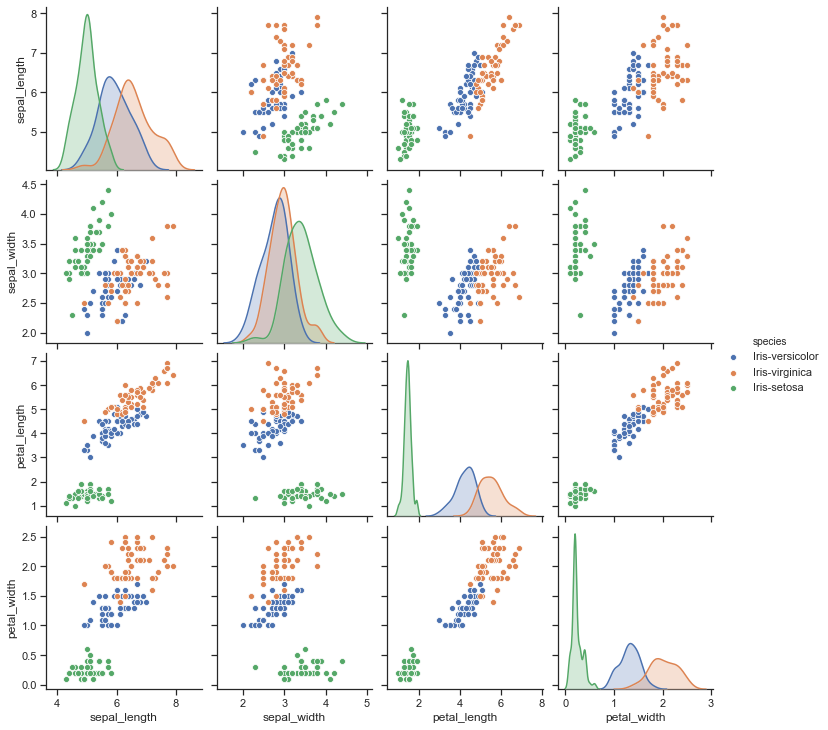

In [3]:
sns.set(style="ticks")
sns.pairplot(data, hue="species")

In [4]:
train_x = all_x[:125]
train_y = all_y[:125]
test_x = all_x[125:]
test_y = all_y[125:]

In [5]:
def integerEncode(Y):
    class_to_int = dict((c,i) for i,c in enumerate(list(np.unique(Y))))
    integer_encoded = [class_to_int[c_name] for c_name in Y]
    return integer_encoded

In [6]:
def oneHotIt(Y,classes):
    class_to_int = dict((c,i) for i,c in enumerate(classes))
    integer_encoded = [class_to_int[c_name] for c_name in Y]
    one_hot_encoded = list()
    for value in integer_encoded:
        col = [0 for _ in range(len(classes))]
        col[value] = 1
        one_hot_encoded.append(col)
    return np.array(one_hot_encoded)

In [7]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [8]:
def getProbsAndPred(someX,weights):
    probs = softmax(np.dot(someX,weights));
    preds = np.argmax(probs,axis=1)
    return probs, preds

In [9]:
def getLosses(x,y,w):
    m = x.shape[0]
    samples = x.shape[1]
    y_mat = oneHotIt(y,np.unique(y))
    scores = np.dot(x,w)
    probs = softmax(scores)
    loss = (-1/m)*np.sum(y_mat*np.log(probs))
    grad = (-1/m)*np.dot(x.T,y_mat-probs)
    return loss,grad

In [10]:
w = np.zeros([all_x.shape[1],len(np.unique(all_y))])
iterations = 5000
learningRate = 1e-2
losses = []
for i in tqdm(range(0,iterations)):
    loss,grad = getLosses(train_x,train_y,w)
    w = w - learningRate*grad;
    losses.append(loss)
print(loss)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4783.61it/s]

0.17807729966468777


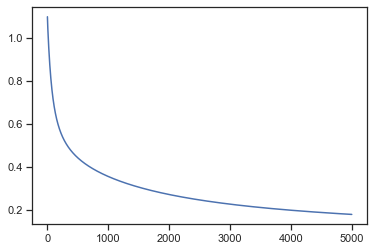

In [11]:
plt.plot(losses)

In [12]:
def getAccuracy(x,y):
    i_y = integerEncode(y)
    probs,preds = getProbsAndPred(x,w)
    accuracy = (sum(preds == i_y)/float(len(i_y)))*100
    return accuracy

In [13]:
print('Training Accuracy: ', getAccuracy(train_x,train_y))
print('Testing Accuracy: ', getAccuracy(test_x,test_y))

Training Accuracy:  96.0
Testing Accuracy:  96.0
